# Лабораторная работа №4, Фундаментальные концепции ИИ

### Попов Матвей, М8О-114СВ-24


Импортируем необходимые библиотеки

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, norm
from sklearn.mixture import GaussianMixture


## Метод ядерного сглаживания

In [39]:
def kernel_density_estimation(data, bandwidth):
    kde = gaussian_kde(data, bw_method=bandwidth)
    return kde


## EM алгоритм

In [40]:
def em_density_estimation(data, n_components=2):
    data = data.reshape(-1, 1)
    gmm = GaussianMixture(n_components=n_components, random_state=0)
    gmm.fit(data)
    return gmm


## Тестирование метода ядерного сглаживания

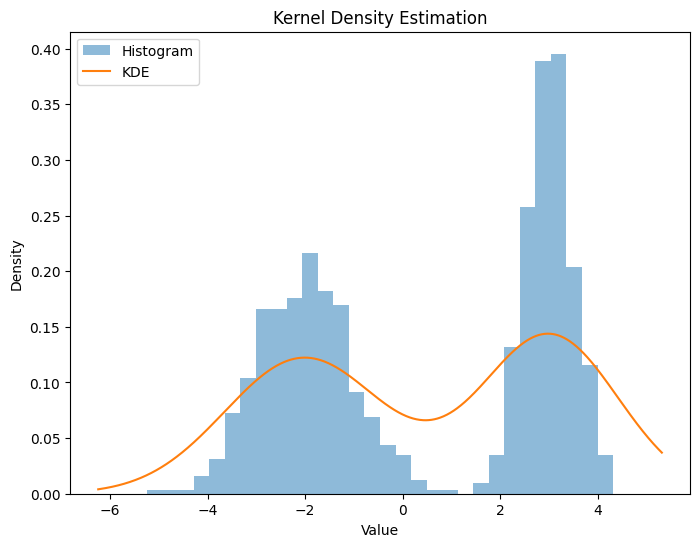

In [41]:
np.random.seed(42)
data = np.concatenate([
    np.random.normal(-2, 1, 500),
    np.random.normal(3, 0.5, 500)
])

kde = kernel_density_estimation(data, bandwidth=0.5)

x = np.linspace(*(data.min() - 1, data.max() + 1), 1000)

y_kde = kde(x)

plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, label='Histogram')
plt.plot(x, y_kde, label='KDE')
plt.title('Kernel Density Estimation')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


## Тестирование EM алгоритма

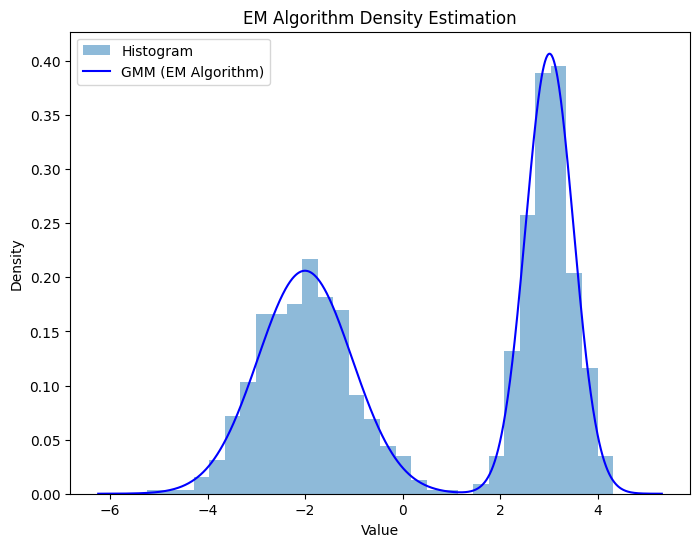

In [42]:
np.random.seed(42)
data = np.concatenate([
    np.random.normal(-2, 1, 500),
    np.random.normal(3, 0.5, 500)
])

gmm = em_density_estimation(data, n_components=2)

x = np.linspace(*(data.min() - 1, data.max() + 1), 1000).reshape(-1, 1)

log_density = gmm.score_samples(x)
y_gmm = np.exp(log_density)

plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, label='Histogram')
plt.plot(x, y_gmm, label='GMM (EM Algorithm)', color='blue')
plt.title('EM Algorithm Density Estimation')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


## Метод Метрополиса-Гастинга

In [43]:
def metropolis_hastings(target_density, initial_value, n_samples, proposal_std):
    samples = [initial_value]
    current = initial_value
    for _ in range(n_samples - 1):
        proposal = np.random.normal(current, proposal_std)
        acceptance_ratio = target_density(proposal) / target_density(current)
        if np.random.rand() < acceptance_ratio:
            current = proposal
        samples.append(current)
    return np.array(samples)


## Метод Гиббса

In [44]:
def gibbs_sampling(initial_values, conditional_distributions, n_samples):
    samples = [initial_values]
    current = np.array(initial_values)
    for _ in range(n_samples - 1):
        for i, conditional in enumerate(conditional_distributions):
            current[i] = conditional(*current[:i], *current[i + 1:])
        samples.append(current.copy())
    return np.array(samples)


## Метод ядерного сглаживания + Метод Метрополиса-Гастинга + Метод Гиббса

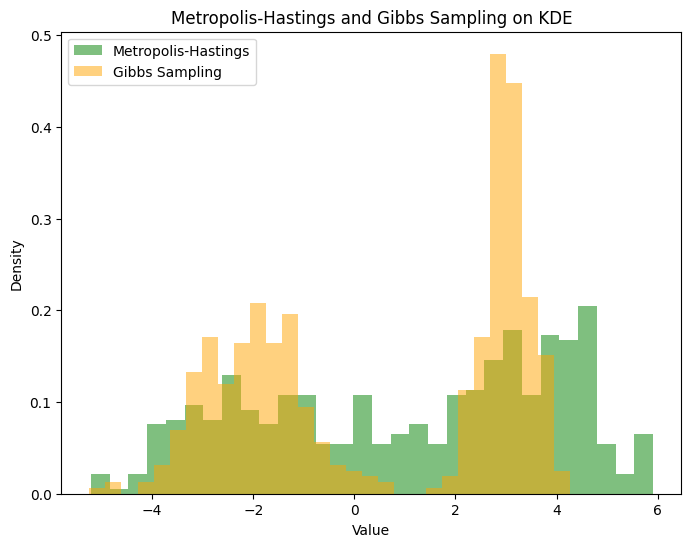

In [45]:
np.random.seed(42)
data = np.concatenate([
    np.random.normal(-2, 1, 500),
    np.random.normal(3, 0.5, 500)
])

kde = kernel_density_estimation(data, bandwidth=0.5)
n_samples = 500

target_density = kde.evaluate
mh_samples = metropolis_hastings(target_density, data.mean(), n_samples, proposal_std=1.0)

gibbs_samples = gibbs_sampling(
    [data.mean()], 
    [lambda: np.random.choice(data)], 
    n_samples
)

plt.figure(figsize=(8, 6))
plt.hist(mh_samples, bins=30, density=True, alpha=0.5, label='Metropolis-Hastings', color='green')
plt.hist(gibbs_samples, bins=30, density=True, alpha=0.5, label='Gibbs Sampling', color='orange')
plt.title('Metropolis-Hastings and Gibbs Sampling on KDE')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


## EM-алгоритм + Метод Метрополиса-Гастинга + Метод Гиббса

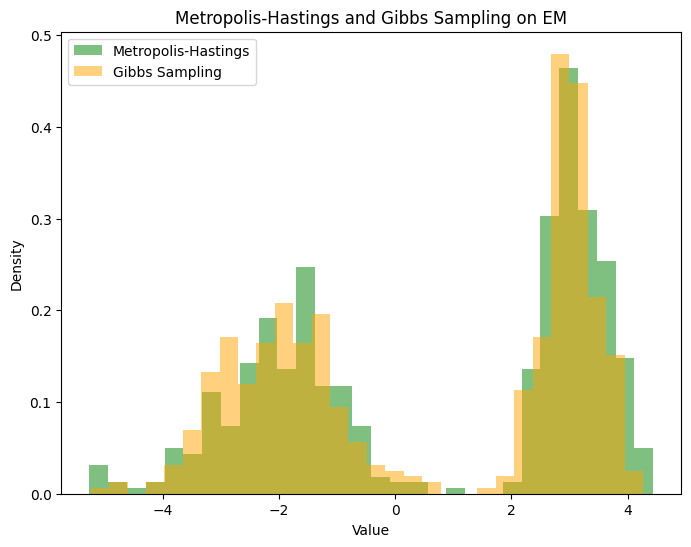

In [46]:
np.random.seed(42)
data = np.concatenate([
    np.random.normal(-2, 1, 500),
    np.random.normal(3, 0.5, 500)
])

gmm = em_density_estimation(data, n_components=2)

def target_density(x):
    return np.exp(gmm.score_samples(np.array([[x]])))

mh_samples = metropolis_hastings(target_density, data.mean(), n_samples, proposal_std=1.0)

gibbs_samples = gibbs_sampling(
    [data.mean()], 
    [lambda: np.random.choice(data)], 
    n_samples
)

plt.figure(figsize=(8, 6))
plt.hist(mh_samples, bins=30, density=True, alpha=0.5, label='Metropolis-Hastings', color='green')
plt.hist(gibbs_samples, bins=30, density=True, alpha=0.5, label='Gibbs Sampling', color='orange')
plt.title('Metropolis-Hastings and Gibbs Sampling on EM')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()
